# Closing the Gap Study Revisited
By: Andrew Clark, Rahn Lieberman, Ryan Shuhart, Thomas Rogers

The below is from how the orginal study in "Closing the Gap: Reducing Racial and Ethnic Disparities" was conducted:

   This brief draws on the 2012–2013 Behavioral Risk Factor Surveillance System (BRFSS), an annual survey conducted by the Centers for Disease Control and Prevention in partnership with state governments. The surveys included landline and cellular telephone interviews with more than 400,000 adults age 18 and older across all 50 states. In performing our analysis, we combined two years of data to ensure an adequate sample size in each of the socioeconomic strata, including income, race and ethnicity, and insurance status. <font color="red">We restricted our analysis to adults under age 65. </font>
   BRFSS asks adults whether they did not visit a doctor when needed within the previous 12 months because of costs, and whether they have one or more than one person they think of as their personal doctor or health care provider.
    Our analysis classifies respondents’ socioeconomic (SES) characteristics as follows:
    
    • Race/ethnicity: white (non-Hispanic), black (non-Hispanic), or Hispanic (any race).
    • Income in three income groups:
      1. Low income: below 200 percent of the federal poverty level (income in 2012 of less than $22,340 if single, or 
      less than $46,100 for a family of four).
      2. Middle income: 200 percent to 399 percent of poverty (income in 2012 of $22,340 up to $44,680 if single, or 
      $46,100 to $92,200 for a family of four).
      3. Higher income: 400 percent of poverty or higher (income in 2012 at or above $44,680 if single, or $92,200 for 
      a family of four).
    • Insurance status: insured or not at the time of the questionnaire.
    
        Exhibit 2 reports unadjusted point estimates, stratified by race/ethnicity. Exhibits 3 and 4 report adjusted means, to account for differences in respondents’ age, sex, income, and health status. We adjusted estimates using survey-design adjusted logistic regressions in Stata (v.12.1).
    
        Unadjusted point estimates were still subject to uncertainty because of the sample design. Each estimate has survey design–adjusted 95 percent confidence intervals of about 1 to 2 percentage points. Statistical significance associated with SES-adjusted point estimates is noted in Exhibits 3 and 4.

## Question of Interest
"Would You Say in General That Your Health is: (1) excellent, (2) very good, (3) good, (4) fair, (5) poor." Choices 7 and 9 were "unsure" and "not asked", respectively. This is in the GENHLTH variable.

In [17]:
# Python Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot graphs in the notebook

%matplotlib inline

In [2]:
# Ryan import
#brfss = pd.read_csv('.\\data\\brfss2012_2014.zip', encoding = "ISO-8859-1", compression='zip')

# Andrew work import:
brfss = pd.read_csv('C:\\Users\\aclark\\Desktop\\SMU\\MSDS6210-Immersion_Project\\Study\\data\\brfss2012_2014.csv', encoding = "ISO-8859-1")

print("Starting length is %.f " % len(brfss))

# Age 18 to 64 - Excludes 65 or older, refused, or missing
brfss = brfss[brfss['_AGE65YR'] == 1] 

# Exclude blank, 'Don't know', 'Not Sure', or 'Refused'
brfss = brfss[((brfss['GENHLTH'].notnull()) & (~brfss['GENHLTH'].isin([7,9])))] 

# Reduce Ethnicity to White, Black, or Hispanic (ex. Asian 2%, American Indian/Alaskan Native 1.55%, other 2.8%)
brfss = brfss[brfss['_IMPRACE'].isin([1,2,5])]
# Has Health plan --Excludes 'Don't know', 'Not Sure', or 'Refused'. drops .6%
brfss = brfss[brfss['HLTHPLN1'].isin([1,2])]

# Translate GENHLTH to binary classification of
# Combining the “excellent”, “very good” and “good” responses as measures of “good or better” (1) health 
# and the “fair” and “poor” measures as “fair and poor” (0).
brfss.loc[(brfss['GENHLTH'] < 4), '_Health'] = 1
brfss.loc[(brfss['GENHLTH'] >= 4), '_Health'] = 0

# Extract survey year from sequence. IYEAR sometimes went into the next year. 
# This is one way to put designate the year of the data publication
brfss['Rec_Year'] = brfss['SEQNO'].astype(str).str[:4].astype(int)

brfss.info()

Starting length is 1432124 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 867987 entries, 0 to 1432123
Data columns (total 44 columns):
SEQNO       867987 non-null float64
_INCOMG     867987 non-null float64
_IMPRACE    867987 non-null float64
_AGE65YR    867987 non-null float64
_AGE_G      867987 non-null float64
GENHLTH     867987 non-null float64
PHYSHLTH    867981 non-null float64
MENTHLTH    867981 non-null float64
HLTHPLN1    867987 non-null float64
PERSDOC2    867986 non-null float64
MEDCOST     867984 non-null float64
VETERAN3    867407 non-null float64
MARITAL     866953 non-null float64
EDUCA       866406 non-null float64
CHECKUP1    867985 non-null float64
INCOME2     864423 non-null float64
SEX         867987 non-null float64
SMOKDAY2    359144 non-null float64
AVEDRNK2    464822 non-null float64
RRCLASS2    32989 non-null float64
RRATWRK2    24131 non-null float64
RRHCARE3    32917 non-null float64
RRPHYSM2    32889 non-null float64
RREMTSM2    32873 non-null float64
E

In [4]:
# grouping race, health and year data into the same dataframe

df_race_hlth_yr = brfss.groupby(['_IMPRACE', '_Health','Rec_Year'])
df_race_yr = brfss.groupby(['_IMPRACE', 'Rec_Year'])

df_yr_hlth_race = brfss.groupby(['Rec_Year', '_Health','_IMPRACE'])
df_yr_race = brfss.groupby(['Rec_Year','_IMPRACE'])

df_yr_race_hlth = brfss.groupby(['Rec_Year', '_IMPRACE', '_Health'])
df_yr_hlth = brfss.groupby(['Rec_Year','_Health'])

df_hlth_yr = brfss.groupby(['Rec_Year','_Health'])
df_yr = brfss.groupby(['Rec_Year'])

In [5]:
#brfss.groupby(['Rec_Year','_Health']).size().unstack()
# df_hlth_yr['Count'].last() / df_hlth_yr['Count'].sum()
df_hlth_yr_grouped = pd.DataFrame({'Count':brfss.groupby(['Rec_Year','_Health']).size()}).reset_index()
df_hlth_yr_counts = df_hlth_yr_grouped.groupby(['Rec_Year','_Health'])
df_hlth_yr_totals = df_hlth_yr_grouped.groupby(['Rec_Year'])
df_hlth_yr_counts['Count'].sum() / df_hlth_yr_totals['Count'].sum()

Rec_Year  _Health
2012      0.0        0.164759
          1.0        0.835241
2013      0.0        0.164321
          1.0        0.835679
2014      0.0        0.159109
          1.0        0.840891
Name: Count, dtype: float64

    _IMPRACE  _Health  Rec_Year  Prop
0        1.0      0.0      2012  14.3
1        1.0      0.0      2013  14.4
2        1.0      0.0      2014  14.0
3        1.0      1.0      2012  85.7
4        1.0      1.0      2013  85.6
5        1.0      1.0      2014  86.0
6        2.0      0.0      2012  23.9
7        2.0      0.0      2013  23.7
8        2.0      0.0      2014  22.7
9        2.0      1.0      2012  76.1
10       2.0      1.0      2013  76.3
11       2.0      1.0      2014  77.3
12       5.0      0.0      2012  26.1
13       5.0      0.0      2013  25.5
14       5.0      0.0      2014  25.1
15       5.0      1.0      2012  73.9
16       5.0      1.0      2013  74.5
17       5.0      1.0      2014  74.9


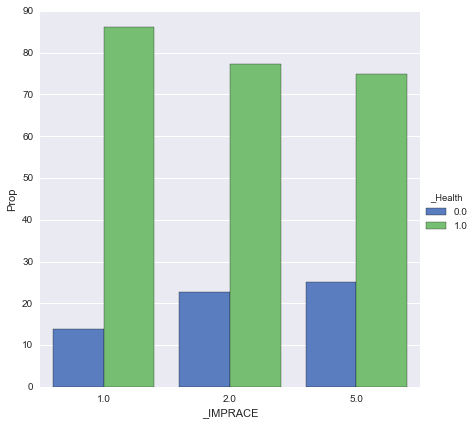

In [10]:
x = pd.DataFrame({'Prop':((df_race_hlth_yr.size().unstack() / df_race_yr.size().unstack())*100).stack()}).reset_index()
print(x)
sns.factorplot(x="_IMPRACE", y="Prop", hue="_Health", data=x[x['Rec_Year']==2014],
                    size=6, kind="bar", palette="muted")

In [11]:

# Set option to show one decimal place
pd.set_option('precision',1)
print("Proportion of Uninsured to Insured by Race and Year")
race_yr_prop = (df_race_hlth_yr.size().unstack() / df_race_yr.size().unstack())*100#.transpose().plot()
print(race_yr_prop.stack())
#race_yr_prop.transpose().plot(kind='bar')
#race_yr_prop.stack().plot(kind='bar')
sns.factorplot(x="_IMPRACE", y="survived", hue="_Health", data=race_yr_prop.stack(),
                   size=6, kind="bar", palette="muted")

Proportion of Uninsured to Insured by Race and Year
_IMPRACE  _Health  Rec_Year
1.0       0.0      2012        14.3
                   2013        14.4
                   2014        14.0
          1.0      2012        85.7
                   2013        85.6
                   2014        86.0
2.0       0.0      2012        23.9
                   2013        23.7
                   2014        22.7
          1.0      2012        76.1
                   2013        76.3
                   2014        77.3
5.0       0.0      2012        26.1
                   2013        25.5
                   2014        25.1
          1.0      2012        73.9
                   2013        74.5
                   2014        74.9
dtype: float64


ValueError: Could not interpret input '_IMPRACE'

Proportion of Uninsured to Insured by Race and Year
_IMPRACE           1.0   2.0   5.0
Rec_Year _Health                  
2012     0.0      14.3  23.9  26.1
         1.0      85.7  76.1  73.9
2013     0.0      14.4  23.7  25.5
         1.0      85.6  76.3  74.5
2014     0.0      14.0  22.7  25.1
         1.0      86.0  77.3  74.9


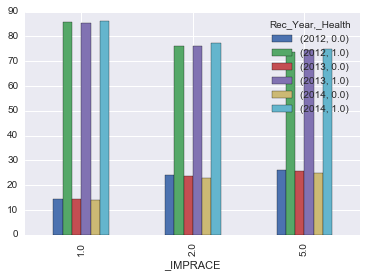

In [12]:
# Set option to show one decimal place
pd.set_option('precision',1)
print("Proportion of Uninsured to Insured by Race and Year")
yr_race_prop = (df_yr_hlth_race.size().unstack() / df_yr_race.size().unstack())*100#.transpose().plot()
print(yr_race_prop)
yr_race_prop.transpose().plot(kind='bar')

Proportion of Uninsured to Insured by Race and Year
_Health             0.0   1.0
Rec_Year _IMPRACE            
2012     1.0       69.6  82.0
         2.0       14.7   9.2
         5.0       15.7   8.8
2013     1.0       70.6  82.3
         2.0       13.8   8.7
         5.0       15.7   9.0
2014     1.0       70.6  82.3
         2.0       13.0   8.4
         5.0       16.4   9.3


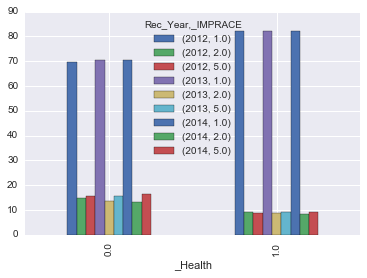

In [13]:
# Set option to show one decimal place
pd.set_option('precision',1)
print("Proportion of Uninsured to Insured by Race and Year")
yr_race_prop = (df_yr_race_hlth.size().unstack() / df_yr_hlth.size().unstack())*100#.transpose().plot()
print(yr_race_prop)
yr_race_prop.transpose().plot(kind='bar')

In [14]:
df_race_hlth_yr.size().unstack()

Rec_Year            2012    2013    2014
_IMPRACE _Health                        
1.0      0.0       33583   34795   30904
         1.0      200572  206364  190581
2.0      0.0        7083    6784    5711
         1.0       22496   21831   19429
5.0      0.0        7561    7718    7183
         1.0       21418   22512   21462

In [15]:
brfss.groupby(['_Health','Rec_Year']).size().unstack()

Rec_Year,2012,2013,2014
_Health,,,
0.0,48227,49297,43798
1.0,244486,250707,231472


In [16]:
brfss.groupby(['_IMPRACE','Rec_Year']).size().unstack()

Rec_Year,2012,2013,2014
_IMPRACE,,,
1.0,234155,241159,221485
2.0,29579,28615,25140
5.0,28979,30230,28645


## Logistic Regression Model 

In [26]:
# resonse variable of interest
brfss._Health.head()

AttributeError: 'DataFrame' object has no attribute '_Health'

In [32]:
# Cross validate the data using K-fold

#references: http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html
# https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb

# import k-fold cross validation from scikit learn
from sklearn.cross_validation import KFold

if '_Health' in brfss:
    y = brfss['_Health'].values # get the labels we want
    del brfss['_Health'] # get rid of the class label
    X = brfss.values # use everything else to predict!
    
    
KFoldCrossObject = KFold(len(y), n_folds=10)

print KFoldCrossObject

sklearn.cross_validation.KFold(n=867987, n_folds=10, shuffle=False, random_state=None)


In [33]:
# do a grid search to optimize parameters 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt